# E-Mail Intelligence

### Importing necessary packages

In [122]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.figure_factory as ff
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
import torch
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import itertools
from nltk.corpus import stopwords
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

# Loading the files names

##### Ham folder

In [2]:
s="C:/Users/Karthi/Desktop/Data/ham/"  #Loaction of ham folder

In [180]:
#Storing the Ham files
ls=os.listdir(s)
ls

['0001.ea7e79d3153e7469e7a9c3e0af6a357e',
 '0002.b3120c4bcbf3101e661161ee7efcb8bf',
 '0003.acfc5ad94bbd27118a0d8685d18c89dd',
 '0004.e8d5727378ddde5c3be181df593f1712',
 '0005.8c3b9e9c0f3f183ddaf7592a11b99957',
 '0006.ee8b0dba12856155222be180ba122058',
 '0007.c75188382f64b090022fa3b095b020b0',
 '0008.20bc0b4ba2d99aae1c7098069f611a9b',
 '0009.435ae292d75abb1ca492dcc2d5cf1570',
 '0010.4996141de3f21e858c22f88231a9f463',
 '0011.07b11073b53634cff892a7988289a72e',
 '0012.d354b2d2f24d1036caf1374dd94f4c94',
 '0013.ff597adee000d073ae72200b0af00cd1',
 '0014.532e0a17d0674ba7a9baa7b0afe5fb52',
 '0015.a9ff8d7550759f6ab62cc200bdf156e7',
 '0016.d82758030e304d41fb3f4ebbb7d9dd91',
 '0017.d81093a2182fc9135df6d9158a8ebfd6',
 '0018.ba70ecbeea6f427b951067f34e23bae6',
 '0019.a8a1b2767e83b3be653e4af0148e1897',
 '0020.ef397cef16f8041242e3b6560e168053',
 '0021.f8e73bdba7277d967af4d561f0402129',
 '0022.7241da4491c49b50c0470a3638ee35c4',
 '0023.b4a61a2990263e8825246e41a8d78399',
 '0024.771af861a302951df7630ec4ff1

You can see that the extension for these files are un-interpretable. Therefore we have to change the file format to .txt

In [4]:
# Creating new file names
ns=[i.split(".")[0]+".txt" for i in ls]
ns

['0001.txt',
 '0002.txt',
 '0003.txt',
 '0004.txt',
 '0005.txt',
 '0006.txt',
 '0007.txt',
 '0008.txt',
 '0009.txt',
 '0010.txt',
 '0011.txt',
 '0012.txt',
 '0013.txt',
 '0014.txt',
 '0015.txt',
 '0016.txt',
 '0017.txt',
 '0018.txt',
 '0019.txt',
 '0020.txt',
 '0021.txt',
 '0022.txt',
 '0023.txt',
 '0024.txt',
 '0025.txt',
 '0026.txt',
 '0027.txt',
 '0028.txt',
 '0029.txt',
 '0030.txt',
 '0031.txt',
 '0032.txt',
 '0033.txt',
 '0034.txt',
 '0035.txt',
 '0036.txt',
 '0037.txt',
 '0038.txt',
 '0039.txt',
 '0040.txt',
 '0041.txt',
 '0042.txt',
 '0043.txt',
 '0044.txt',
 '0045.txt',
 '0046.txt',
 '0047.txt',
 '0048.txt',
 '0049.txt',
 '0050.txt',
 '0051.txt',
 '0052.txt',
 '0053.txt',
 '0054.txt',
 '0055.txt',
 '0056.txt',
 '0057.txt',
 '0058.txt',
 '0059.txt',
 '0060.txt',
 '0061.txt',
 '0062.txt',
 '0063.txt',
 '0064.txt',
 '0065.txt',
 '0066.txt',
 '0067.txt',
 '0068.txt',
 '0069.txt',
 '0070.txt',
 '0071.txt',
 '0072.txt',
 '0073.txt',
 '0074.txt',
 '0075.txt',
 '0076.txt',
 '0077.txt',

In [5]:
# Renaming the exsisting filenames with new names
for i in range(len(ls)):
    os.rename(s+ls[i],s+ns[i])

##### Spam folder

In [6]:
sp="C:/Users/Karthi/Desktop/hamnspam/spam/" # Spam Location

In [181]:
#Loading Spam Files
ls1=os.listdir(sp)
ls1

['0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1',
 '0001.bfc8d64d12b325ff385cca8d07b84288',
 '0002.24b47bb3ce90708ae29d0aec1da08610',
 '0003.4b3d943b8df71af248d12f8b2e7a224a',
 '0004.1874ab60c71f0b31b580f313a3f6e777',
 '0005.1f42bb885de0ef7fc5cd09d34dc2ba54',
 '0006.7a32642f8c22bbeb85d6c3b5f3890a2c',
 '0007.859c901719011d56f8b652ea071c1f8b',
 '0008.9562918b57e044abfbce260cc875acde',
 '0009.c05e264fbf18783099b53dbc9a9aacda',
 '0010.7f5fb525755c45eb78efc18d7c9ea5aa',
 '0011.2a1247254a535bac29c476b86c708901',
 '0012.7bc8e619ad0264979edce15083e70a02',
 '0013.9034ac0917f6fdb82c5ee6a7509029ed',
 '0014.ed99ffe0f452b91be11684cbfe8d349c',
 '0015.1b871d654560011a0aaa29bb4e9054f7',
 '0016.f9c349935955e1ccc7626270da898445',
 '0017.49ab70c7a4042cb1c695a0e59a6ede54',
 '0018.259154a52bc55dcae491cfded60a5cd2',
 '0019.939e70d8367f315193e4bc5be80dc262',
 '0020.4120dc06a0124a8688e96f8cff029113',
 '0021.15185fdb3fb02dffd041fa8f70d19791',
 '0022.4b5cf3c16feb88dd6932a8c46a41946c',
 '0023.4299adbda55862876440ecbc2fc

In [8]:
# Creating new names for spam files
ns1=[i.split(".")[0]+".txt" for i in ls1]
ns1

['0001.txt',
 '0002.txt',
 '0003.txt',
 '0004.txt',
 '0005.txt',
 '0006.txt',
 '0007.txt',
 '0008.txt',
 '0009.txt',
 '0010.txt',
 '0011.txt',
 '0012.txt',
 '0013.txt',
 '0014.txt',
 '0015.txt',
 '0016.txt',
 '0017.txt',
 '0018.txt',
 '0019.txt',
 '0020.txt',
 '0021.txt',
 '0022.txt',
 '0023.txt',
 '0024.txt',
 '0025.txt',
 '0026.txt',
 '0027.txt',
 '0028.txt',
 '0029.txt',
 '0030.txt',
 '0031.txt',
 '0032.txt',
 '0033.txt',
 '0034.txt',
 '0035.txt',
 '0036.txt',
 '0037.txt',
 '0038.txt',
 '0039.txt',
 '0040.txt',
 '0041.txt',
 '0042.txt',
 '0043.txt',
 '0044.txt',
 '0045.txt',
 '0046.txt',
 '0047.txt',
 '0048.txt',
 '0049.txt',
 '0050.txt',
 '0051.txt',
 '0052.txt',
 '0053.txt',
 '0054.txt',
 '0055.txt',
 '0056.txt',
 '0057.txt',
 '0058.txt',
 '0059.txt',
 '0060.txt',
 '0061.txt',
 '0062.txt',
 '0063.txt',
 '0064.txt',
 '0065.txt',
 '0066.txt',
 '0067.txt',
 '0068.txt',
 '0069.txt',
 '0070.txt',
 '0071.txt',
 '0072.txt',
 '0073.txt',
 '0074.txt',
 '0075.txt',
 '0076.txt',
 '0077.txt',

In [9]:
# Reanming the spam files with new names
for i in range(len(ls1)):
    os.rename(sp+ls1[i],sp+ns1[i])

### Extracting the data out of file

In [10]:
# Opening the files and storing the data in it
d={"Content":[],"Class":[]}
for i in ns:
    d['Content'].append(open(s+i,encoding="ISO-8859-1").read()) # ISO-8859-1 is Latin-1 Supplement (Unicode block)
d["Class"].extend(["Ham"]*len(ns))
for i in ns1:
    d['Content'].append(open(sp+i,encoding="ISO-8859-1").read())
d["Class"].extend(["Spam"]*len(ns1))

In [11]:
#Creating dataframe with extracted data
df=pd.DataFrame(d)
df

Content Class
0     From exmh-workers-admin@redhat.com  Thu Aug 22...   Ham
1     From Steve_Burt@cursor-system.com  Thu Aug 22 ...   Ham
2     From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...   Ham
3     From irregulars-admin@tb.tf  Thu Aug 22 14:23:...   Ham
4     From exmh-users-admin@redhat.com  Thu Aug 22 1...   Ham
...                                                 ...   ...
3046  From biz2biz2446@Flashmail.com  Mon Oct  7 22:...  Spam
3047  From cna@insiq.us  Tue Oct  8 00:10:39 2002\nR...  Spam
3048  From bounce2@u-answer.com  Tue Oct  8 11:02:30...  Spam
3049  From beautyinfufuxxxmeb13mxy@aol.com  Tue Oct ...  Spam
3050  From evtwqmigru@datcon.co.uk  Tue Oct  8 11:02...  Spam

[3051 rows x 2 columns]

In [12]:
# Example for using ISO-8859-1 encoding (8-bit single-byte coded graphic character sets)
open(sp+'0123.txt',encoding="ISO-8859-1").read()

'From sitescooper-talk-admin@lists.sourceforge.net  Mon Aug 26 20:15:19 2002\nReturn-Path: <sitescooper-talk-admin@lists.sourceforge.net>\nDelivered-To: zzzz@localhost.example.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.example.com (Postfix) with ESMTP id 92C1843F9B\n\tfor <zzzz@localhost>; Mon, 26 Aug 2002 15:15:19 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor zzzz@localhost (single-drop); Mon, 26 Aug 2002 20:15:19 +0100 (IST)\nReceived: from usw-sf-list2.sourceforge.net (usw-sf-fw2.sourceforge.net\n    [216.136.171.252]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id\n    g7QJ9ZZ05743 for <zzzz-scoop@jmason.org>; Mon, 26 Aug 2002 20:09:35 +0100\nReceived: from usw-sf-list1-b.sourceforge.net ([10.3.1.13]\n    helo=usw-sf-list1.sourceforge.net) by usw-sf-list2.sourceforge.net with\n    esmtp (Exim 3.31-VA-mm2 #1 (Debian)) id 17jPEm-0001Sc-00; Mon,\n    26 Aug 2002 12:09:20 -0700\nReceived: from [65.19

In [13]:
# Getting the Root Address and From Address
ori=[]
fro=[]
for i in df.Content:
    sample=i
    ori.append(sample[5:sample.find("\nReturn-Path")].split()[0])
    sample=sample[sample.find("From: "):]
    fro.append(sample[:sample.find("\n")].split()[-1][1:][::-1][1:][::-1])
pd.DataFrame({"Root Address":ori,"From Address":fro})

Root Address                   From Address
0       exmh-workers-admin@redhat.com              kre@munnari.OZ.AU
1        Steve_Burt@cursor-system.com   steve.burt@cursor-system.com
2                       timc@2ubh.com                  timc@2ubh.com
3              irregulars-admin@tb.tf               monty@roscom.com
4         exmh-users-admin@redhat.com         tony@linuxworks.com.au
...                               ...                            ...
3046        biz2biz2446@Flashmail.com        iz2biz2446@Flashmail.co
3047                     cna@insiq.us                   cna@insiq.us
3048             bounce2@u-answer.com          nswer.Us@davicom.co.k
3049  beautyinfufuxxxmeb13mxy@aol.com  eautyinfufuxxxmeb13mxy@aol.co
3050          evtwqmigru@datcon.co.uk        evtwqmigru@datcon.co.uk

[3051 rows x 2 columns]

In [14]:
# Checking whether the Root and From address is same
same=[]
for i in range(len(ori)):
    if ori[i].lower()==fro[i].lower():
        same.append(1)
    else:
        same.append(0)
pd.DataFrame({"Root Address":ori,"From Address":fro,"Same":same})

Root Address                   From Address  Same
0       exmh-workers-admin@redhat.com              kre@munnari.OZ.AU     0
1        Steve_Burt@cursor-system.com   steve.burt@cursor-system.com     0
2                       timc@2ubh.com                  timc@2ubh.com     1
3              irregulars-admin@tb.tf               monty@roscom.com     0
4         exmh-users-admin@redhat.com         tony@linuxworks.com.au     0
...                               ...                            ...   ...
3046        biz2biz2446@Flashmail.com        iz2biz2446@Flashmail.co     0
3047                     cna@insiq.us                   cna@insiq.us     1
3048             bounce2@u-answer.com          nswer.Us@davicom.co.k     0
3049  beautyinfufuxxxmeb13mxy@aol.com  eautyinfufuxxxmeb13mxy@aol.co     0
3050          evtwqmigru@datcon.co.uk        evtwqmigru@datcon.co.uk     1

[3051 rows x 3 columns]

In [15]:
# Storing the Same_RF in dataset
df["Same_RF"]=same
df

Content Class  Same_RF
0     From exmh-workers-admin@redhat.com  Thu Aug 22...   Ham        0
1     From Steve_Burt@cursor-system.com  Thu Aug 22 ...   Ham        0
2     From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...   Ham        1
3     From irregulars-admin@tb.tf  Thu Aug 22 14:23:...   Ham        0
4     From exmh-users-admin@redhat.com  Thu Aug 22 1...   Ham        0
...                                                 ...   ...      ...
3046  From biz2biz2446@Flashmail.com  Mon Oct  7 22:...  Spam        0
3047  From cna@insiq.us  Tue Oct  8 00:10:39 2002\nR...  Spam        1
3048  From bounce2@u-answer.com  Tue Oct  8 11:02:30...  Spam        0
3049  From beautyinfufuxxxmeb13mxy@aol.com  Tue Oct ...  Spam        0
3050  From evtwqmigru@datcon.co.uk  Tue Oct  8 11:02...  Spam        1

[3051 rows x 3 columns]

In [16]:
# List of Disposable mail domain names
spam_add=['@cashette.com' ,'@gawab.com' ,'@mail.ru' ,'@freestuffo2.com' ,'@freestuffo1.com' ,'@freestuffo3.com' ,'@freestuffo4.com' 
    ,'@cash.com' ,'@tradedoubling.co.uk' ,'@users.1go.dk' ,'@one.lt' ,'@isuisse.com' ,'@iespana.es' ,'@mytrashmail.com' 
    ,'@bigmir.net' ,'@pornoroxx.net' ,'@freenet.de' ,'@mail15.com' ,'@fromru.com' ,'@hotpop.com' ,'@cashette.com' ,'@*.ru' 
    ,'@ukr.net' ,'@sibmail.com' ,'@thecannabishunter.com' ,'@advertfast.com' ,'@gawab.com' ,'@163.com' ,'@aichyna.com' 
    ,'@berahe.info' ,'@bi-dating.info' ,'@bk.ru' ,'@bookee.com' ,'@cashette.com' ,'@ccxt.info' ,'@chcb.info' ,'@corsa-tuning.' 
    ,'@deo-vindice' ,'@domain141.com' ,'@europe.com' ,'@fanaticars.info' ,'@faza.ru , @masterhost.ru' ,'@find-love.info' 
    ,'@for-fun.info' ,'@foteret.info' ,'@freefreemail.info' ,'@gawab.com' ,'@gold2world.biz' ,'@grifon.info' ,'@inbox.ru' 
    ,'@korsun.pp.ru' ,'@list.ru' ,'@mail.ru' ,'@mail333.com' ,'@moyareklama.ru' ,'@msk.su' ,'@muuh.info' ,'@myxost.com' 
    ,'@ne-quid-nimis.info' ,'@nil-admirari.info' ,'@octivian.com' ,'@pisem.net' ,'@pochta.ru' ,'@pooperduperz@gmail.com' 
    ,'@porn.com' ,'@portsaid.cc' ,'@prescrip.pl' ,'@punkass.com' ,'@qlfg.com' ,'@rambler.ru' ,'@sibmail.com' ,'@skim.com' 
    ,'@smeh.info' ,'@spambob.net' ,'@tele-vision.info' ,'@tut.by' ,'@ukr.net' ,'@vxaz.com' ,'@yandex.ru' ,'@yufz.com' 
    ,'@6url.com' ,'@bumpymail.com' ,'@cashette.com' ,'@centermail.com' ,'@centermail.net' ,'@discardmail.com' ,'@dodgeit.com' 
    ,'@e4ward.com' ,'@emailias.com' ,'@fakeinformation.com' ,'@front14.org' ,'@gawab.com' ,'@ghosttexter.de' ,'@gishpuppy.com' 
    ,'@greensloth.com' ,'@inbox.ru' ,'@jetable.org' ,'@kasmail.com' ,'@link2mail.net' ,'@mail.ru' ,'@mailexpire.com' 
    ,'@mailmoat.com' ,'@mailinator.com' ,'@mailnull.com' ,'@messagebeamer.de' ,'@mytrashmail.com' ,'@nervmich.net' 
    ,'@netmails.net' ,'@netzidiot.de' ,'@nurfuerspam.de' ,'@pookmail.com' ,'@portsaid.cc' ,'@privacy.net' ,'@punkass.com' 
    ,'@sneakemail.com' ,'@sofort-mail.de' ,'@sogetthis.com' ,'@spam.la' ,'@spambob.com' ,'@spambob.net' ,'@spambob.org' 
    ,'@spamday.com' ,'@spamex.com' ,'@spamgourmet.com' ,'@spamhole.com' ,'@spaminator.de' ,'@spammotel.com' ,'@spamtrail.com' 
    ,'@tempinbox.com' ,'@trash-mail.de' ,'@trashmail.net' ,'@ukr.net' ,'@xents.com' ,'@wuzup.net' ,'@zoemail.com' 
    ,'@marketingops.com' ,'@pisem.net' ,'@pleasantphoto.com' ,'@reitkopf.com' ,'@inbox.ru' ,'@mail333.com' ,'@mail.ru'
    ,'@list.ru' ,'@mail15.com' ,'@minelab.ru' ,'@fromru.com' ,'@xoxma.net' ,'@*.ru' ,'@mail.ru' ,'@cashette.com' 
    ,'@yandex.ru' ,'@kefir.000buy.com' ,'@bigfreemail.info' ,'@cashette.com' ,'@mail.ru' ,'@spambob' ,'@gawab.com' 
    ,'@bumpymail.com' ,'@centermail.com' ,'@centermail.net' ,'@discardmail.com' ,'@dodgeit.com' ,'@e4ward.com' 
    ,'@emailias.com' ,'@fakeinformation.com' ,'@front14.org' ,'@ghosttexter.de' ,'@jetable.net' ,'@kasmail.com' 
    ,'@link2mail.net' ,'@mailexpire.com' ,'@mailinator.com' ,'@mailmoat.com' ,'@messagebeamer.de' ,'@mytrashmail.com' 
    ,'@nervmich.net' ,'@netmails.net' ,'@netzidiot.de' ,'@nurfuerspam.de' ,'@privacy.net' ,'@punkass.com' ,'@sneakemail.com' 
    ,'@sofort-mail.de' ,'@sogetthis.com' ,'@spam.la' ,'@spamex.com' ,'@spamgourmet.com' ,'@spamhole.com' ,'@spaminator.de' 
    ,'@spammotel.com' ,'@spamtrail.com' ,'@trash-mail.de' ,'@trashmail.net' ,'@wuzup.net' ,'@portsaid.cc' ,'@sriaus.com' 
    ,'@ukr.net' ,'@pisem.net' ,'@mail333.com' ,'@gold-profits.info' ,'@sibmail.com' ,'@algerie.cc' ,'@blida.info' 
    ,'@mascara.ws' ,'@oran.cc' ,'@oued.info' ,'@oued.org' ,'@bahraini.cc' ,'@manama.cc' ,'@cameroon.cc' ,'@djibouti.cc' 
    ,'@timor.cc' ,'@alex4all.com' ,'@alexandria.cc' ,'@aswan.cc' ,'@banha.cc' ,'@giza.cc' ,'@ismailia.cc' ,'@mansoura.tv' 
    ,'@portsaid.cc' ,'@sharm.cc' ,'@sinai.cc' ,'@suez.cc' ,'@tanta.cc' ,'@zagazig.cc' ,'@eritrea.cc' ,'@guinea.cc' 
    ,'@najaf.cc' ,'@amman.cc' ,'@aqaba.cc' ,'@irbid.ws' ,'@jerash.cc' ,'@karak.cc' ,'@urdun.cc' ,'@zarqa.cc' ,'@kuwaiti.tv' 
    ,'@safat.biz' ,'@safat.info' ,'@safat.us' ,'@safat.ws' ,'@salmiya.biz' ,'@kyrgyzstan.cc' ,'@baalbeck.cc' ,'@hamra.cc' 
    ,'@lebanese.cc' ,'@lubnan.cc' ,'@lubnan.ws' ,'@agadir.cc' ,'@jadida.cc' ,'@jadida.org' ,'@maghreb.cc' ,'@marrakesh.cc' 
    ,'@meknes.cc' ,'@nador.cc' ,'@oujda.biz' ,'@oujda.cc' ,'@rabat.cc' ,'@tangiers.cc' ,'@tetouan.cc' ,'@dhofar.cc' 
    ,'@gabes.cc' ,'@ibra.cc' ,'@muscat.tv' ,'@muscat.ws' ,'@omani.ws' ,'@salalah.cc' ,'@seeb.cc' ,'@pakistani.ws' 
    ,'@falasteen.cc' ,'@hebron.tv' ,'@nablus.cc' ,'@quds.cc' ,'@rafah.cc' ,'@ramallah.cc' ,'@yunus.cc' ,'@abha.cc' 
    ,'@ahsa.ws' ,'@albaha.cc' ,'@alriyadh.cc' ,'@arar.ws' ,'@buraydah.cc' ,'@dhahran.cc' ,'@jizan.cc' ,'@jouf.cc' 
    ,'@khobar.cc' ,'@madinah.cc' ,'@qassem.cc' ,'@tabouk.cc' ,'@tayef.cc' ,'@yanbo.cc' ,'@dominican.cc' ,'@khartoum.cc' 
    ,'@omdurman.cc' ,'@sudanese.cc' ,'@hasakah.com' ,'@homs.cc' ,'@latakia.cc' ,'@palmyra.cc' ,'@palmyra.ws' ,'@siria.cc' 
    ,'@tajikistan.cc' ,'@bizerte.cc' ,'@gafsa.cc' ,'@kairouan.cc' ,'@nabeul.cc' ,'@nabeul.info' ,'@sfax.ws' ,'@sousse.cc' 
    ,'@tunisian.cc' ,'@ajman.cc' ,'@ajman.us' ,'@ajman.ws' ,'@fujairah.cc' ,'@fujairah.us' ,'@fujairah.ws' ,'@khaimah.cc' 
    ,'@sanaa.cc' ,'@yemeni.cc' ,'@zambia.cc' ,'@au.ru' ,'@bk.ru' ,'@fromru.ru' ,'@front.ru' ,'@go.ru' ,'@halyava.ru' 
    ,'@hotmail.ru' ,'@id.ru' ,'@inbox.ru' ,'@land.ru' ,'@list.ru' ,'@mailgate.ru' ,'@newmail.ru' ,'@nextmail.ru' ,'@nm.ru' 
    ,'@notmail.ru' ,'@ok.ru' ,'@pochta.ru' ,'@rambler.ru' ,'@ru.ru' ,'@sendmail.ru' ,'@yandex.ru' ,'@zmail.ru' 
    ,'@gomail.com.ua' ,'@mail15.com' ,'@algerie.cc' ,'@blida.info' ,'@mascara.ws' ,'@oran.cc' ,'@oued.info' ,'@oued.org' 
    ,'@bahraini.cc' ,'@manama.cc' ,'@cameroon.cc' ,'@djibouti.cc' ,'@timor.cc' ,'@alex4all.com' ,'@alexandria.cc' ,'@aswan.cc' 
    ,'@banha.cc' ,'@giza.cc' ,'@ismailia.cc' ,'@mansoura.tv' ,'@portsaid.cc' ,'@sharm.cc' ,'@sinai.cc' ,'@suez.cc' 
    ,'@tanta.cc' ,'@zagazig.cc' ,'@eritrea.cc' ,'@guinea.cc' ,'@najaf.cc' ,'@amman.cc' ,'@aqaba.cc' ,'@irbid.ws' ,'@jerash.cc' 
    ,'@karak.cc' ,'@urdun.cc' ,'@zarqa.cc' ,'@kuwaiti.tv' ,'@safat.biz' ,'@safat.info' ,'@safat.us' ,'@safat.ws' 
    ,'@salmiya.biz' ,'@kyrgyzstan.cc' ,'@baalbeck.cc' ,'@hamra.cc' ,'@lebanese.cc' ,'@lubnan.cc' ,'@lubnan.ws' ,'@agadir.cc' 
    ,'@jadida.cc' ,'@jadida.org' ,'@maghreb.cc' ,'@marrakesh.cc' ,'@meknes.cc' ,'@nador.cc' ,'@oujda.biz' ,'@oujda.cc' 
    ,'@rabat.cc' ,'@tangiers.cc' ,'@tetouan.cc' ,'@dhofar.cc' ,'@gabes.cc' ,'@ibra.cc' ,'@muscat.tv' ,'@muscat.ws' ,'@omani.ws' 
    ,'@salalah.cc' ,'@seeb.cc' ,'@pakistani.ws' ,'@falasteen.cc' ,'@hebron.tv' ,'@nablus.cc' ,'@quds.cc' ,'@rafah.cc' 
    ,'@ramallah.cc' ,'@yunus.cc' ,'@abha.cc' ,'@ahsa.ws' ,'@albaha.cc' ,'@alriyadh.cc' ,'@arar.ws' ,'@buraydah.cc' 
    ,'@dhahran.cc' ,'@jizan.cc' ,'@jouf.cc' ,'@khobar.cc' ,'@madinah.cc' ,'@qassem.cc' ,'@tabouk.cc' ,'@tayef.cc' 
    ,'@yanbo.cc' ,'@dominican.cc' ,'@khartoum.cc' ,'@omdurman.cc' ,'@sudanese.cc' ,'@hasakah.com' ,'@homs.cc' ,'@latakia.cc' 
    ,'@palmyra.cc' ,'@palmyra.ws' ,'@siria.cc' ,'@tajikistan.cc' ,'@bizerte.cc' ,'@gafsa.cc' ,'@kairouan.cc' ,'@nabeul.cc' 
    ,'@nabeul.info' ,'@sfax.ws' ,'@sousse.cc' ,'@tunisian.cc' ,'@ajman.cc' ,'@ajman.us' ,'@ajman.ws' ,'@fujairah.cc' 
    ,'@fujairah.us' ,'@fujairah.ws' ,'@khaimah.cc' ,'@sanaa.cc' ,'@yemeni.cc' ,'@zambia.cc' ,'@au.ru' ,'@bk.ru' ,'@fromru.ru' 
    ,'@front.ru' ,'@go.ru' ,'@halyava.ru' ,'@hotmail.ru' ,'@id.ru' ,'@inbox.ru' ,'@land.ru' ,'@list.ru' ,'@mailgate.ru' 
    ,'@newmail.ru' ,'@nextmail.ru' ,'@nm.ru' ,'@notmail.ru' ,'@ok.ru' ,'@pochta.ru' ,'@rambler.ru' ,'@ru.ru' ,'@sendmail.ru' 
    ,'@yandex.ru' ,'@zmail.ru' ,'@gomail.com.ua' ,'@mail15.com' ,'@bumpymail.com' ,'@centermail.com' ,'@centermail.net' 
    ,'@discardmail.com' ,'@dodgeit.com' ,'@e4ward.com' ,'@emailias.com' ,'@front14.org' ,'@ghosttexter.de' ,'@jetable.net' 
    ,'@jetable.org' ,'@kasmail.com' ,'@link2mail.net' ,'@mail333.com' ,'@mailblocks.com' ,'@maileater.com' ,'@mailexpire.com' 
    ,'@mailinator.com' ,'@mailmoat.com' ,'@mailnull.com' ,'@mailshell.com' ,'@mailzilla.com' ,'@messagebeamer.de' 
    ,'@mytrashmail.com' ,'@nervmich.net' ,'@netmails.net' ,'@netzidiot.de' ,'@nurfuerspam.de' ,'@pookmail.com' ,'@portsaid.cc' 
    ,'@privacy.net' ,'@punkass.com' ,'@shortmail.net' ,'@sibmail.com' ,'@sneakemail.com' ,'@sofort-mail.de' ,'@sogetthis.com' 
    ,'@spam.la' ,'@spambob.com' ,'@spambob.net' ,'@spambob.org' ,'@spamex.com' ,'@spamgourmet.com' ,'@spamhole.com' 
    ,'@spaminator.de' ,'@spammotel.com' ,'@spamtrail.com' ,'@tempinbox.com' ,'@trash-mail.de' ,'@trashmail.net' 
    ,'@bumpymail.com' ,'@centermail.com' ,'@centermail.net' ,'@discardmail.com' ,'@dodgeit.com' ,'@e4ward.com' 
    ,'@emailias.com' ,'@front14.org' ,'@ghosttexter.de' ,'@jetable.net' ,'@jetable.org' ,'@kasmail.com' ,'@link2mail.net' 
    ,'@mail333.com' ,'@mailblocks.com' ,'@maileater.com' ,'@mailexpire.com' ,'@mailinator.com' ,'@mailmoat.com' 
    ,'@mailnull.com' ,'@mailshell.com' ,'@mailzilla.com' ,'@messagebeamer.de' ,'@mytrashmail.com' ,'@nervmich.net' 
    ,'@netmails.net' ,'@netzidiot.de' ,'@nurfuerspam.de' ,'@pookmail.com' ,'@portsaid.cc' ,'@privacy.net' ,'@punkass.com' 
    ,'@shortmail.net' ,'@sibmail.com' ,'@sneakemail.com' ,'@sofort-mail.de' ,'@sogetthis.com' ,'@spam.la' ,'@spambob.com' 
    ,'@spambob.net' ,'@spambob.org' ,'@spamex.com' ,'@spamgourmet.com' ,'@spamhole.com' ,'@spaminator.de' ,'@spammotel.com' 
    ,'@spamtrail.com' ,'@tempinbox.com' ,'@trash-mail.de' ,'@trashmail.net']

In [17]:
# Joining all Mail domains into a single string
disposable_add="  ".join(list(set(spam_add)))
disposable_add

'@spamtrail.com  @sofort-mail.de  @yufz.com  @corsa-tuning.  @korsun.pp.ru  @163.com  @gishpuppy.com  @greensloth.com  @sinai.cc  @qassem.cc  @berahe.info  @spam.la  @djibouti.cc  @quds.cc  @siria.cc  @myxost.com  @safat.ws  @thecannabishunter.com  @alexandria.cc  @ramallah.cc  @ru.ru  @tradedoubling.co.uk  @aqaba.cc  @id.ru  @maileater.com  @freestuffo2.com  @fanaticars.info  @nabeul.info  @omdurman.cc  @mail15.com  @banha.cc  @dominican.cc  @muscat.ws  @kairouan.cc  @privacy.net  @zarqa.cc  @reitkopf.com  @jetable.net  @porn.com  @yunus.cc  @rambler.ru  @hamra.cc  @salmiya.biz  @faza.ru , @masterhost.ru  @omani.ws  @ahsa.ws  @spambob.net  @freestuffo4.com  @isuisse.com  @buraydah.cc  @jizan.cc  @agadir.cc  @msk.su  @latakia.cc  @freestuffo1.com  @iespana.es  @algerie.cc  @centermail.net  @pisem.net  @dhahran.cc  @hasakah.com  @yemeni.cc  @discardmail.com  @freestuffo3.com  @ajman.cc  @netmails.net  @cashette.com  @ukr.net  @grifon.info  @mailinator.com  @urdun.cc  @sfax.ws  @sharm.cc

In [18]:
# To check whether the domain of the from or root address is a disposable domain or not
dis=[]
for i in range(len(fro)):
    if "@" in ori[i] and "@" in fro[i]:
        if ori[i].split("@")[1] in disposable_add or fro[i].split("@")[1] in disposable_add:
            dis.append(1)
        else:
            dis.append(0)
    else:
        dis.append(0)

In [19]:
# Storing the disposable column into the dataset
df["Dispo"]=dis
df

Content Class  Same_RF  Dispo
0     From exmh-workers-admin@redhat.com  Thu Aug 22...   Ham        0      0
1     From Steve_Burt@cursor-system.com  Thu Aug 22 ...   Ham        0      0
2     From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...   Ham        1      0
3     From irregulars-admin@tb.tf  Thu Aug 22 14:23:...   Ham        0      0
4     From exmh-users-admin@redhat.com  Thu Aug 22 1...   Ham        0      0
...                                                 ...   ...      ...    ...
3046  From biz2biz2446@Flashmail.com  Mon Oct  7 22:...  Spam        0      0
3047  From cna@insiq.us  Tue Oct  8 00:10:39 2002\nR...  Spam        1      0
3048  From bounce2@u-answer.com  Tue Oct  8 11:02:30...  Spam        0      0
3049  From beautyinfufuxxxmeb13mxy@aol.com  Tue Oct ...  Spam        0      0
3050  From evtwqmigru@datcon.co.uk  Tue Oct  8 11:02...  Spam        1      0

[3051 rows x 4 columns]

In [20]:
# Encoding the Class label
df.Class.replace(["Ham","Spam"],[0,1],inplace=True)
df

Content  Class  Same_RF  Dispo
0     From exmh-workers-admin@redhat.com  Thu Aug 22...      0        0      0
1     From Steve_Burt@cursor-system.com  Thu Aug 22 ...      0        0      0
2     From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...      0        1      0
3     From irregulars-admin@tb.tf  Thu Aug 22 14:23:...      0        0      0
4     From exmh-users-admin@redhat.com  Thu Aug 22 1...      0        0      0
...                                                 ...    ...      ...    ...
3046  From biz2biz2446@Flashmail.com  Mon Oct  7 22:...      1        0      0
3047  From cna@insiq.us  Tue Oct  8 00:10:39 2002\nR...      1        1      0
3048  From bounce2@u-answer.com  Tue Oct  8 11:02:30...      1        0      0
3049  From beautyinfufuxxxmeb13mxy@aol.com  Tue Oct ...      1        0      0
3050  From evtwqmigru@datcon.co.uk  Tue Oct  8 11:02...      1        1      0

[3051 rows x 4 columns]

In [21]:
# Describe all features
df.describe(include='all').T

count unique                                                top freq  \
Content  3051   3046  From razor-users-admin@lists.sourceforge.net  ...    2   
Class    3051    NaN                                                NaN  NaN   
Same_RF  3051    NaN                                                NaN  NaN   
Dispo    3051    NaN                                                NaN  NaN   

               mean        std  min  25%  50%  75%  max  
Content         NaN        NaN  NaN  NaN  NaN  NaN  NaN  
Class      0.163881   0.370228    0    0    0    0    1  
Same_RF    0.106522   0.308556    0    0    0    0    1  
Dispo    0.00819403  0.0901641    0    0    0    0    1

In [22]:
# Viewing Null values
df.isnull().sum()

Content    0
Class      0
Same_RF    0
Dispo      0
dtype: int64

<AxesSubplot:>

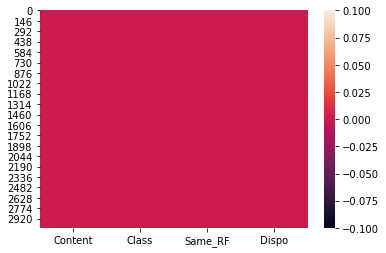

In [23]:
# Plotting the Null Values in heat map
sns.heatmap(df.isnull())

<AxesSubplot:>

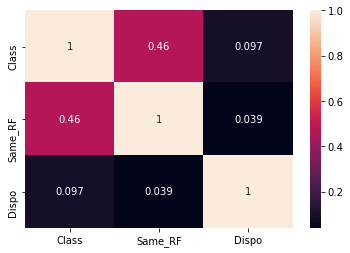

In [24]:
# Heat map for correlation
sns.heatmap(df.corr(),annot=True)

In [25]:
# Representing Target Class in Pie Chart
category_ct = df['Class'].replace([0,1],["Ham","Spam"]).value_counts()
fig = px.pie(values=category_ct.values,names=category_ct.index,color_discrete_sequence=px.colors.sequential.OrRd,title= 'Pie Graph: Spam or Ham')
fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=15,marker=dict(line=dict(color='#000000', width=2)))
fig.show()

Even though the target variable is imbalanced, we will upsample the Spam class after all preprocessing to reduce computation

In [26]:
# Visualizing Length Distribution of Ham and Spam messages
df["length"] = df["Content"].apply(len)  # Adding length to the dataframe
ham = df.loc[np.where(df['Class'] == 0)].reset_index() #Creating ham dataframe
spam = df.loc[np.where(df['Class'] == 1)].reset_index()  #Creating spam dataframe
ham.drop('index',axis=1,inplace=True)
spam.drop('index',axis=1,inplace=True)
colors = ['black', 'red']
fig = ff.create_distplot([ham['length'],spam['length']], ['ham','spam'], show_hist=False, colors=colors) # ff-> figure factory
fig.update_layout(title_text='Length distribution of ham and spam messages')
fig.show()

In [27]:
# Sample for complete Email
print(df.Content[0])

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@example.com>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.example.com (listman.example.com [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@example.com>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.example.com
Received: from int-mx1.corp.example.com (int-mx1.corp.example.com
    [172.16.52.254]) by lis

In [28]:
# Storing the actual mail from whole content 
actua=[]
for i in df["Content"]:
    actua.append(i[i.find("From:"):])
actua[0]

'From: Robert Elz <kre@munnari.OZ.AU>\nTo: Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\nCc: exmh-workers@example.com\nSubject: Re: New Sequences Window\nIn-Reply-To: <1029945287.4797.TMDA@deepeddy.vircio.com>\nReferences: <1029945287.4797.TMDA@deepeddy.vircio.com>\n    <1029882468.3116.TMDA@deepeddy.vircio.com> <9627.1029933001@munnari.OZ.AU>\n    <1029943066.26919.TMDA@deepeddy.vircio.com>\n    <1029944441.398.TMDA@deepeddy.vircio.com>\nMIME-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nMessage-Id: <13258.1030015585@munnari.OZ.AU>\nX-Loop: exmh-workers@example.com\nSender: exmh-workers-admin@example.com\nErrors-To: exmh-workers-admin@example.com\nX-Beenthere: exmh-workers@example.com\nX-Mailman-Version: 2.0.1\nPrecedence: bulk\nList-Help: <mailto:exmh-workers-request@example.com?subject=help>\nList-Post: <mailto:exmh-workers@example.com>\nList-Subscribe: <https://listman.example.com/mailman/listinfo/exmh-workers>,\n    <mailto:exmh-workers-request@redhat.com

In [29]:
# Defining a function to extract body out of the whole mail content
def body_extracter(smp):
    lz1=[]
    temp=[]
    for i in smp.split("\n"):
        temp.append(i)
        if ":" in i:
            if ord(i[0]) in range(65,91) and i[:i.find(":")].lower() not in ["http","https"] and " " not in i[:i.find(":")]:
                lz1.append(temp)
                temp=[]
    lz1.append(temp)
    lenz=[len(i) for i in lz1]
    stmp="\n".join(lz1[::-1][lenz[::-1].index(max(lenz))])
    if "Date" in stmp[:stmp.find(":")]:
        stmp="\n".join(map(str.lstrip,stmp.split("\n")[2:])) # 2 because there is a \n at the beggining of the sentence
    return "\n".join([j for j in stmp[stmp.find(":")+1:].lstrip().split("\n") if len(j.lstrip())!=0])

In [30]:
# Displaying body of first mail
print(body_extracter(df.Content[0]))

Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>
| I can't reproduce this error.
For me it is very repeatable... (like every time, without fail).
This is the debug log of the pick happening ...
18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...
Note, if I run the pick command by hand ...
delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit
That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...
delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 ICT 2002]
And the relevant part of my .mh_profile ...
delta$ mhparam pick
-se

In [31]:
# Finding the body of all the the mails in the dataset
body=[]
for i in df.Content:
    body.append(body_extracter(i))
body

['Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\nMessage-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n| I can\'t reproduce this error.\nFor me it is very repeatable... (like every time, without fail).\nThis is the debug log of the pick happening ...\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\nNote, if I run the pick command by hand ...\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 ICT 2002]\nAnd the relevant part of my .mh_profile ...\n

In [32]:
# Adding the body column to the dataset
df["Body"]=body
df

Content  Class  Same_RF  \
0     From exmh-workers-admin@redhat.com  Thu Aug 22...      0        0   
1     From Steve_Burt@cursor-system.com  Thu Aug 22 ...      0        0   
2     From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...      0        1   
3     From irregulars-admin@tb.tf  Thu Aug 22 14:23:...      0        0   
4     From exmh-users-admin@redhat.com  Thu Aug 22 1...      0        0   
...                                                 ...    ...      ...   
3046  From biz2biz2446@Flashmail.com  Mon Oct  7 22:...      1        0   
3047  From cna@insiq.us  Tue Oct  8 00:10:39 2002\nR...      1        1   
3048  From bounce2@u-answer.com  Tue Oct  8 11:02:30...      1        0   
3049  From beautyinfufuxxxmeb13mxy@aol.com  Tue Oct ...      1        0   
3050  From evtwqmigru@datcon.co.uk  Tue Oct  8 11:02...      1        1   

      Dispo  length                                               Body  
0         0    4963  Chris Garrigues <cwg-dated-1030377287.06fa6d@D...  
1         0    3354  Tassos Papadopoulos, the Greek sculptor behind...  
2         0    3912  40 PM\nMOSCOW (AP) - Security officers on Thur...  
3         0    3413  //www.pcworld.com/news/article/0,aid,103259,00...  
4         0    4897  46, Ulises Ponce wrote:\n> Hi!\n> \n> Is there...  
...     ...     ...                                                ...  
3046      0    5007                                                     
3047      0   17626  //iiq.us/images/cna/top.jpg" =\nwidth=3D"550" ...  
3048      0    7641  collapse" bordercolor="#425074" width="586" id...  
3049      0    3541  //www.generaledu.com/ebaymktg">visit us here.<...  
3050      0   25193  Simultaneous, High-Spirited; "Stimulation / Re...  

[3051 rows x 6 columns]

# Formatting the Content

##### Changing all words to lower case

In [33]:
df1=df.copy() # makinng a copy of the intinial dataset
df1['Content'] = [i.lower() for i in df1['Content']]
df1['Body'] = [i.lower() for i in df1['Body']]
df1

Content  Class  Same_RF  \
0     from exmh-workers-admin@redhat.com  thu aug 22...      0        0   
1     from steve_burt@cursor-system.com  thu aug 22 ...      0        0   
2     from timc@2ubh.com  thu aug 22 13:52:59 2002\n...      0        1   
3     from irregulars-admin@tb.tf  thu aug 22 14:23:...      0        0   
4     from exmh-users-admin@redhat.com  thu aug 22 1...      0        0   
...                                                 ...    ...      ...   
3046  from biz2biz2446@flashmail.com  mon oct  7 22:...      1        0   
3047  from cna@insiq.us  tue oct  8 00:10:39 2002\nr...      1        1   
3048  from bounce2@u-answer.com  tue oct  8 11:02:30...      1        0   
3049  from beautyinfufuxxxmeb13mxy@aol.com  tue oct ...      1        0   
3050  from evtwqmigru@datcon.co.uk  tue oct  8 11:02...      1        1   

      Dispo  length                                               Body  
0         0    4963  chris garrigues <cwg-dated-1030377287.06fa6d@d...  
1         0    3354  tassos papadopoulos, the greek sculptor behind...  
2         0    3912  40 pm\nmoscow (ap) - security officers on thur...  
3         0    3413  //www.pcworld.com/news/article/0,aid,103259,00...  
4         0    4897  46, ulises ponce wrote:\n> hi!\n> \n> is there...  
...     ...     ...                                                ...  
3046      0    5007                                                     
3047      0   17626  //iiq.us/images/cna/top.jpg" =\nwidth=3d"550" ...  
3048      0    7641  collapse" bordercolor="#425074" width="586" id...  
3049      0    3541  //www.generaledu.com/ebaymktg">visit us here.<...  
3050      0   25193  simultaneous, high-spirited; "stimulation / re...  

[3051 rows x 6 columns]

##### Removing punchuation and other special character

In [34]:
pun=['?', ':', '!', '$', '.', ',', '!', '|', '*', '&', '^', '%', '-', '#', '`', '~', '_', ';', '+', '+', '/', '<',
       '>', '{', '[', '}', ']',"'s",'"','\\',")","(","\t"]
print(pun)

['?', ':', '!', '$', '.', ',', '!', '|', '*', '&', '^', '%', '-', '#', '`', '~', '_', ';', '+', '+', '/', '<', '>', '{', '[', '}', ']', "'s", '"', '\\', ')', '(', '\t']


In [35]:
# Function to remove un-necessary spaces and lines
def space(s):
    return " ".join([j.lstrip() for j in s.split("\n") if len(j.lstrip())!=0])

In [36]:
for i,j in zip(pun,":;<>({[)]}#$%^&|\\/*_-+="):  # i for Content and j for Body
    df1['Content'] = df1['Content'].str.replace(i,' ')
    df1['Body'] = df1['Body'].str.replace(j,' ')
df1['Content'] = [space(k) for k in df1['Content']]
df1['Body'] = [space(k) for k in df1['Body']]
df1

Content  Class  Same_RF  \
0     from exmh workers admin@redhat com  thu aug 22...      0        0   
1     from steve burt@cursor system com  thu aug 22 ...      0        0   
2     from timc@2ubh com  thu aug 22 13 52 59 2002 r...      0        1   
3     from irregulars admin@tb tf  thu aug 22 14 23 ...      0        0   
4     from exmh users admin@redhat com  thu aug 22 1...      0        0   
...                                                 ...    ...      ...   
3046  from biz2biz2446@flashmail com  mon oct  7 22 ...      1        0   
3047  from cna@insiq us  tue oct  8 00 10 39 2002 re...      1        1   
3048  from bounce2@u answer com  tue oct  8 11 02 30...      1        0   
3049  from beautyinfufuxxxmeb13mxy@aol com  tue oct ...      1        0   
3050  from evtwqmigru@datcon co uk  tue oct  8 11 02...      1        1   

      Dispo  length                                               Body  
0         0    4963  chris garrigues  cwg dated 1030377287.06fa6d@d...  
1         0    3354  tassos papadopoulos, the greek sculptor behind...  
2         0    3912  40 pm moscow  ap    security officers on thurs...  
3         0    3413  www.pcworld.com news article 0,aid,103259,00.a...  
4         0    4897  46, ulises ponce wrote  hi! is there a command...  
...     ...     ...                                                ...  
3046      0    5007                                                     
3047      0   17626  iiq.us images cna top.jpg"   width 3d"550" hei...  
3048      0    7641  collapse" bordercolor " 425074" width "586" id...  
3049      0    3541  www.generaledu.com ebaymktg" visit us here.  a...  
3050      0   25193  simultaneous, high spirited  "stimulation   re...  

[3051 rows x 6 columns]

#### Replacing empty body by None

In [37]:
len(df1.Body.str.lstrip()[3046])

0

In [38]:
for i,j in enumerate(df1.Body):
    if len(j.lstrip())==0:
        df1["Body"][i]="None"

In [39]:
df1.Body.str.lstrip()[3046]

'None'

In [40]:
# Function to generate Term-Frequency
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

In [131]:
# Email Remover
def email_rem(s):
    ls=[]
    for i in s.split():
        if "@" not in i:
            ls.append(i)
    return " ".join(ls)

In [137]:
# Combining all words in ham and spam and storing it into seperate variables
ham = email_rem(" ".join(df1["Body"].loc[np.where(df1['Class'] == 0)])).split()
spam = email_rem(" ".join(df1["Body"].loc[np.where(df1['Class'] == 1)])).split()

In [138]:
# Displaying top 10 words in Ham
freq_df = Freq_df(ham)
top_10 = freq_df[:10]
fig = px.bar(top_10, x = 'Term', y = 'Frequency',pattern_shape="Frequency",text = 'Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.Oryel, title = 'Rank of terms in Ham')
for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"
fig.update_traces(textposition='inside',textfont_size=11)
fig.show()

In [139]:
# Displaying top 10 terms in Spam
freq_df = Freq_df(spam)
top_10 = freq_df[:10]
fig = px.bar(top_10, x = 'Term', y = 'Frequency',pattern_shape="Frequency",text = 'Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.Agsunset, title = 'Rank of terms in spam')
for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"
fig.update_traces(textposition='inside',textfont_size=11)
fig.show()

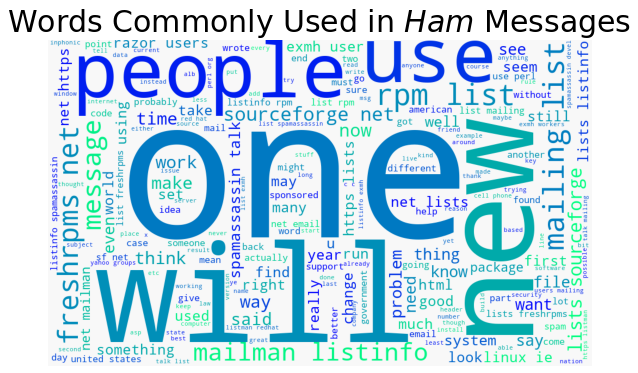

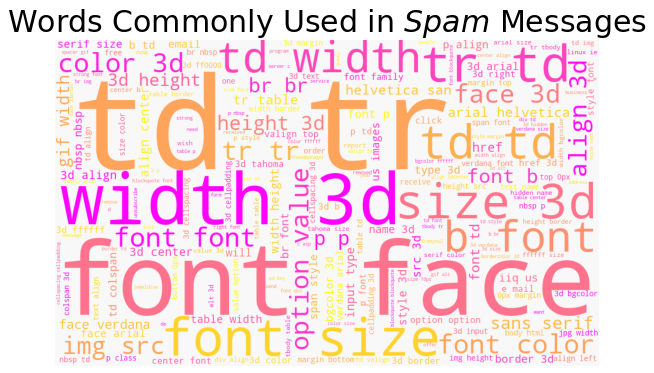

In [140]:
# Visualizing Word Cloud for Ham and Spam
t=["Ham","Spam"]
for label, cmap in zip([0, 1], ["winter", "spring"]):
    text = df1.query("Class == @label")["Body"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${ t[label] }$ Messages", size=30)
    plt.show()

In [45]:
# Function for removing short words
def small(s):
    temp=[]
    for j in s.split():
        if len(j)>=3:                  
            temp.append(j)
    return " ".join(temp)

In [46]:
# Making a copy of Dataframe and removing Short words
df2=df1.copy()
for i,j in enumerate(df2.Content):
    df2.Content.iloc[i]=small(j)
    df2.Body.iloc[i]=small(df2.Body.iloc[i])
df2

Content  Class  Same_RF  \
0     from exmh workers admin@redhat com thu aug 200...      0        0   
1     from steve burt@cursor system com thu aug 2002...      0        0   
2     from timc@2ubh com thu aug 2002 return path ti...      0        1   
3     from irregulars admin@tb thu aug 2002 return p...      0        0   
4     from exmh users admin@redhat com thu aug 2002 ...      0        0   
...                                                 ...    ...      ...   
3046  from biz2biz2446@flashmail com mon oct 2002 re...      1        0   
3047  from cna@insiq tue oct 2002 return path cna@in...      1        1   
3048  from bounce2@u answer com tue oct 2002 return ...      1        0   
3049  from beautyinfufuxxxmeb13mxy@aol com tue oct 2...      1        0   
3050  from evtwqmigru@datcon tue oct 2002 return pat...      1        1   

      Dispo  length                                               Body  
0         0    4963  chris garrigues cwg dated 1030377287.06fa6d@de...  
1         0    3354  tassos papadopoulos, the greek sculptor behind...  
2         0    3912  moscow security officers thursday seized unide...  
3         0    3413  www.pcworld.com news article 0,aid,103259,00.a...  
4         0    4897  46, ulises ponce wrote hi! there command inser...  
...     ...     ...                                                ...  
3046      0    5007                                               None  
3047      0   17626  iiq.us images cna top.jpg" width 3d"550" heigh...  
3048      0    7641  collapse" bordercolor 425074" width "586" "aut...  
3049      0    3541  www.generaledu.com ebaymktg" visit here. font ...  
3050      0   25193  simultaneous, high spirited "stimulation relax...  

[3051 rows x 6 columns]

In [47]:
# NLTK Lematization
lemmatizer = WordNetLemmatizer() # Initializing Lemmatizer
lem_body= []
lem_content= []
for i in range(len(df)):
    temp = []
    for w in df2['Content'].iloc[i].split():
        temp.append(lemmatizer.lemmatize(w))
    lem_content.append(" ".join(temp))
    temp=[]
    for w in df2['Body'].iloc[i].split():
        temp.append(lemmatizer.lemmatize(w))
    lem_body.append(" ".join(temp))
# Replacing the exsisting text with lemetized text
df2.Body=lem_body
df2.Content=lem_content
df2

Content  Class  Same_RF  \
0     from exmh worker admin@redhat com thu aug 2002...      0        0   
1     from steve burt@cursor system com thu aug 2002...      0        0   
2     from timc@2ubh com thu aug 2002 return path ti...      0        1   
3     from irregular admin@tb thu aug 2002 return pa...      0        0   
4     from exmh user admin@redhat com thu aug 2002 r...      0        0   
...                                                 ...    ...      ...   
3046  from biz2biz2446@flashmail com mon oct 2002 re...      1        0   
3047  from cna@insiq tue oct 2002 return path cna@in...      1        1   
3048  from bounce2@u answer com tue oct 2002 return ...      1        0   
3049  from beautyinfufuxxxmeb13mxy@aol com tue oct 2...      1        0   
3050  from evtwqmigru@datcon tue oct 2002 return pat...      1        1   

      Dispo  length                                               Body  
0         0    4963  chris garrigues cwg dated 1030377287.06fa6d@de...  
1         0    3354  tasso papadopoulos, the greek sculptor behind ...  
2         0    3912  moscow security officer thursday seized uniden...  
3         0    3413  www.pcworld.com news article 0,aid,103259,00.a...  
4         0    4897  46, ulises ponce wrote hi! there command inser...  
...     ...     ...                                                ...  
3046      0    5007                                               None  
3047      0   17626  iiq.us image cna top.jpg" width 3d"550" height...  
3048      0    7641  collapse" bordercolor 425074" width "586" "aut...  
3049      0    3541  www.generaledu.com ebaymktg" visit here. font ...  
3050      0   25193  simultaneous, high spirited "stimulation relax...  

[3051 rows x 6 columns]

In [48]:
# Getting the stop_words
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
# Removing the stop words from the Content and Body
for i in stop_words:
    regex = r"\b" + i + r"\b"  #Used to denote whole word in regex
    df2['Content'] = df2['Content'].str.replace(regex, '')
    df2['Body'] = df2['Body'].str.replace(regex, '')
df2

Content  Class  Same_RF  \
0      exmh worker admin@redhat com thu aug 2002 ret...      0        0   
1      steve burt@cursor system com thu aug 2002 ret...      0        0   
2      timc@2ubh com thu aug 2002 return path timc@2...      0        1   
3      irregular admin@tb thu aug 2002 return path i...      0        0   
4      exmh user admin@redhat com thu aug 2002 retur...      0        0   
...                                                 ...    ...      ...   
3046   biz2biz2446@flashmail com mon oct 2002 return...      1        0   
3047   cna@insiq tue oct 2002 return path cna@insiq ...      1        1   
3048   bounce2@u answer com tue oct 2002 return path...      1        0   
3049   beautyinfufuxxxmeb13mxy@aol com tue oct 2002 ...      1        0   
3050   evtwqmigru@datcon tue oct 2002 return path ev...      1        1   

      Dispo  length                                               Body  
0         0    4963  chris garrigues cwg dated 1030377287.06fa6d@de...  
1         0    3354  tasso papadopoulos,  greek sculptor behind  pl...  
2         0    3912  moscow security officer thursday seized uniden...  
3         0    3413  www.pcworld.com news article 0,aid,103259,00.a...  
4         0    4897  46, ulises ponce wrote hi!  command insert  si...  
...     ...     ...                                                ...  
3046      0    5007                                               None  
3047      0   17626  iiq.us image cna top.jpg" width 3d"550" height...  
3048      0    7641  collapse" bordercolor 425074" width "586" "aut...  
3049      0    3541  www.generaledu.com ebaymktg" visit . font font...  
3050      0   25193  simultaneous, high spirited "stimulation relax...  

[3051 rows x 6 columns]

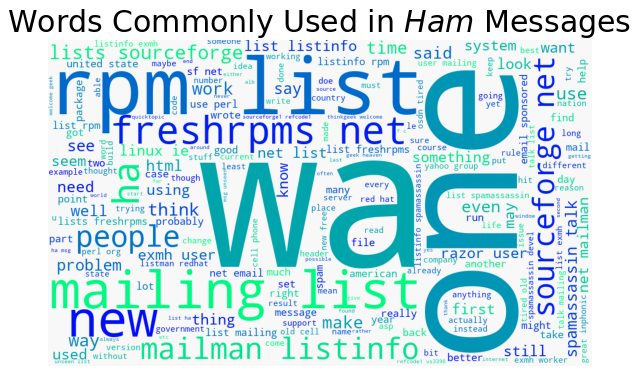

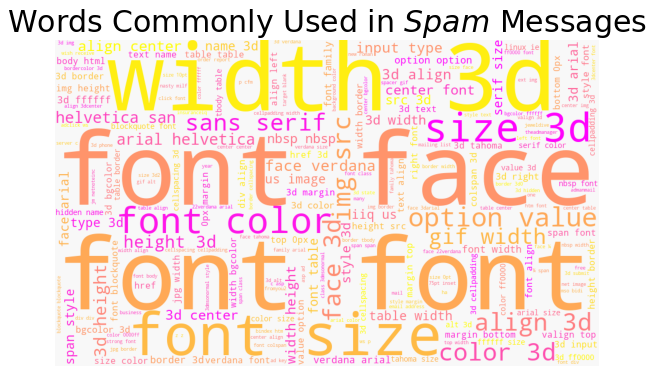

In [144]:
# Visualizing Word Cloud for Ham and Spam after lemetizing
t=["Ham","Spam"]
for label, cmap in zip([0, 1], ["winter", "spring"]):
    text = df2.query("Class == @label")["Body"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${ t[label] }$ Messages", size=30)
    plt.show()

## Summarization

###### T5 Model is used for summarization

In [50]:
# Initializing Pre trained model for summarizing
t5model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

In [51]:
# Summary function for content 
def summarize(text):
    preprocess_text = text.strip().replace("\n","")
    tokenized_text = tokenizer.encode(preprocess_text, return_tensors="pt").to(device) # return PyTorch tensors
    summary_ids = t5model.generate(tokenized_text,num_beams=4,no_repeat_ngram_size=2,min_length=25,max_length=35,early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [52]:
def summarize_sm(text):
    tokenized_text = tokenizer.encode(text, return_tensors="pt").to(device)
    summary_ids = t5model.generate(tokenized_text,num_beams=2,no_repeat_ngram_size=2,min_length=round(len(text)/8),max_length=round(len(text)/9),early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [53]:
sum1=summarize(df1.Body[10])
sum1

"cvs'ed the unseen sequences changes and installed them, and have only one real issue. hmmm, i"

In [54]:
sum2=summarize(df2.Body[10])
sum2

"wed, aug 2002 0400 cvs'ed unseen sequence change installed, one real issue. hmmm, stole"

In [55]:
cvb=sum1+" "+sum2

In [56]:
summarize_sm(cvb)

'unseen sequences changes installed them, and have only one real issue. '

In [157]:
def get_Summary(i):
    return summarize_sm(summarize(df1.Body[i])+" "+summarize(df2.Body[i]))


In [158]:
get_Summary(10)

'unseen sequences changes installed them, and have only one real issue. '

### Balancing Dataset

<AxesSubplot:xlabel='Class', ylabel='count'>

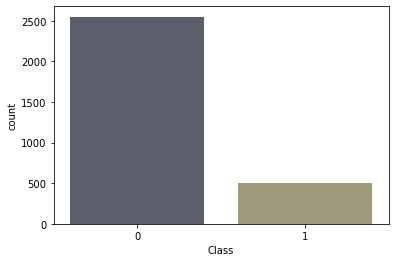

In [57]:
sns.countplot(df2.Class,palette="cividis")

In [58]:
df3=df2.copy()
df3=pd.concat([df3,df2[df2["Class"]==1],df2[df2["Class"]==1],df2[df2["Class"]==1],df2[df2["Class"]==1]])
df3

Content  Class  Same_RF  \
0      exmh worker admin@redhat com thu aug 2002 ret...      0        0   
1      steve burt@cursor system com thu aug 2002 ret...      0        0   
2      timc@2ubh com thu aug 2002 return path timc@2...      0        1   
3      irregular admin@tb thu aug 2002 return path i...      0        0   
4      exmh user admin@redhat com thu aug 2002 retur...      0        0   
...                                                 ...    ...      ...   
3046   biz2biz2446@flashmail com mon oct 2002 return...      1        0   
3047   cna@insiq tue oct 2002 return path cna@insiq ...      1        1   
3048   bounce2@u answer com tue oct 2002 return path...      1        0   
3049   beautyinfufuxxxmeb13mxy@aol com tue oct 2002 ...      1        0   
3050   evtwqmigru@datcon tue oct 2002 return path ev...      1        1   

      Dispo  length                                               Body  
0         0    4963  chris garrigues cwg dated 1030377287.06fa6d@de...  
1         0    3354  tasso papadopoulos,  greek sculptor behind  pl...  
2         0    3912  moscow security officer thursday seized uniden...  
3         0    3413  www.pcworld.com news article 0,aid,103259,00.a...  
4         0    4897  46, ulises ponce wrote hi!  command insert  si...  
...     ...     ...                                                ...  
3046      0    5007                                               None  
3047      0   17626  iiq.us image cna top.jpg" width 3d"550" height...  
3048      0    7641  collapse" bordercolor 425074" width "586" "aut...  
3049      0    3541  www.generaledu.com ebaymktg" visit . font font...  
3050      0   25193  simultaneous, high spirited "stimulation relax...  

[5051 rows x 6 columns]

<AxesSubplot:xlabel='Class', ylabel='count'>

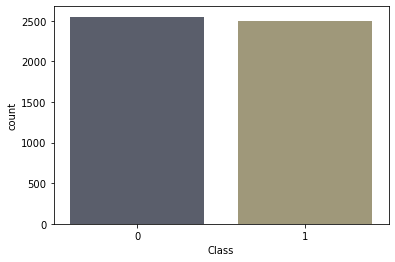

In [59]:
sns.countplot(df3.Class,palette="cividis")

### Creating Count Vector Matrix

In [164]:
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df3['Content'])

In [165]:
y = df3['Class']

In [166]:
X=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
X

00  000  0000  000000  000066  000080  0000ff  0100  0200  0300  ...  \
0      0    0     0       0       0       0       0     2     0     0  ...   
1      0    0     5       0       0       0       0     5     0     0  ...   
2      1    0     5       0       0       0       0     4     0     0  ...   
3      0    0     1       0       0       0       0     2     0     0  ...   
4      0    0     0       0       0       0       0     2     0     0  ...   
...   ..  ...   ...     ...     ...     ...     ...   ...   ...   ...  ...   
5046   0    1     0       0       0       0       0     3     0     0  ...   
5047   0    4     0       1       0       0       0     3     0     0  ...   
5048   0    0     0       0       0       0       0     4     0     0  ...   
5049   0    0     0       0       0       0       0     4     0     0  ...   
5050   1    0     1       0       0       0       0     4     0     0  ...   

      yahoogroups  year  yes  yet  yyyy  zoo  zzzlist  zzzz  zzzzason  \
0               0     0    0    0     0    0        0     4         0   
1               9     0    0    0     0    0        0     5         0   
2               8     0    0    0     0    0        0     5         0   
3               0     0    0    0     0    0        0     4         0   
4               0     0    0    0     0    0        0     4         0   
...           ...   ...  ...  ...   ...  ...      ...   ...       ...   
5046            0     2    0    0     0    0        0     5         1   
5047            0     2    0    0     0    0        0     5         1   
5048            0     0    0    0     0    0        0     5         1   
5049            0     0    0    0     0    0        0     3         1   
5050            0    11    0    1     0    0        0     5         1   

      zzzzteana  
0             0  
1             8  
2             8  
3             0  
4             0  
...         ...  
5046          0  
5047          0  
5048          0  
5049          0  
5050          0  

[5051 rows x 1000 columns]

In [167]:
X["Dispo"]=df3.Dispo.reset_index().Dispo
X

00  000  0000  000000  000066  000080  0000ff  0100  0200  0300  ...  \
0      0    0     0       0       0       0       0     2     0     0  ...   
1      0    0     5       0       0       0       0     5     0     0  ...   
2      1    0     5       0       0       0       0     4     0     0  ...   
3      0    0     1       0       0       0       0     2     0     0  ...   
4      0    0     0       0       0       0       0     2     0     0  ...   
...   ..  ...   ...     ...     ...     ...     ...   ...   ...   ...  ...   
5046   0    1     0       0       0       0       0     3     0     0  ...   
5047   0    4     0       1       0       0       0     3     0     0  ...   
5048   0    0     0       0       0       0       0     4     0     0  ...   
5049   0    0     0       0       0       0       0     4     0     0  ...   
5050   1    0     1       0       0       0       0     4     0     0  ...   

      year  yes  yet  yyyy  zoo  zzzlist  zzzz  zzzzason  zzzzteana  Dispo  
0        0    0    0     0    0        0     4         0          0      0  
1        0    0    0     0    0        0     5         0          8      0  
2        0    0    0     0    0        0     5         0          8      0  
3        0    0    0     0    0        0     4         0          0      0  
4        0    0    0     0    0        0     4         0          0      0  
...    ...  ...  ...   ...  ...      ...   ...       ...        ...    ...  
5046     2    0    0     0    0        0     5         1          0      0  
5047     2    0    0     0    0        0     5         1          0      0  
5048     0    0    0     0    0        0     5         1          0      0  
5049     0    0    0     0    0        0     3         1          0      0  
5050    11    0    1     0    0        0     5         1          0      0  

[5051 rows x 1001 columns]

In [168]:
X["Same"]=df3.Same_RF.reset_index().Same_RF
X

00  000  0000  000000  000066  000080  0000ff  0100  0200  0300  ...  \
0      0    0     0       0       0       0       0     2     0     0  ...   
1      0    0     5       0       0       0       0     5     0     0  ...   
2      1    0     5       0       0       0       0     4     0     0  ...   
3      0    0     1       0       0       0       0     2     0     0  ...   
4      0    0     0       0       0       0       0     2     0     0  ...   
...   ..  ...   ...     ...     ...     ...     ...   ...   ...   ...  ...   
5046   0    1     0       0       0       0       0     3     0     0  ...   
5047   0    4     0       1       0       0       0     3     0     0  ...   
5048   0    0     0       0       0       0       0     4     0     0  ...   
5049   0    0     0       0       0       0       0     4     0     0  ...   
5050   1    0     1       0       0       0       0     4     0     0  ...   

      yes  yet  yyyy  zoo  zzzlist  zzzz  zzzzason  zzzzteana  Dispo  Same  
0       0    0     0    0        0     4         0          0      0     0  
1       0    0     0    0        0     5         0          8      0     0  
2       0    0     0    0        0     5         0          8      0     1  
3       0    0     0    0        0     4         0          0      0     0  
4       0    0     0    0        0     4         0          0      0     0  
...   ...  ...   ...  ...      ...   ...       ...        ...    ...   ...  
5046    0    0     0    0        0     5         1          0      0     0  
5047    0    0     0    0        0     5         1          0      0     1  
5048    0    0     0    0        0     5         1          0      0     0  
5049    0    0     0    0        0     3         1          0      0     0  
5050    0    1     0    0        0     5         1          0      0     1  

[5051 rows x 1002 columns]

In [153]:
def plot_confusion_matrix(cm, classes,cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

In [170]:
acc={}

Train accuracy : 0.9477296726504751
Test  accuracy :  0.9469517022961204


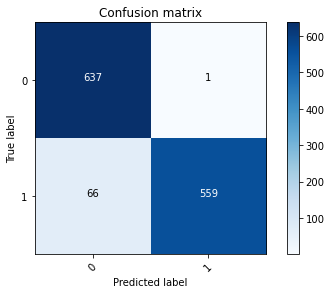

In [171]:
clf = MultinomialNB()
clf = clf.fit(X_train, y_train)
print("Train accuracy :",accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy : ",accuracy_score(y_test, clf.predict(X_test)))
acc["Multinomial"]=accuracy_score(y_test, clf.predict(X_test))
CM = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(CM, classes = range(2))

Train accuracy : 0.9955121436114044
Test  accuracy :  0.9936658749010293


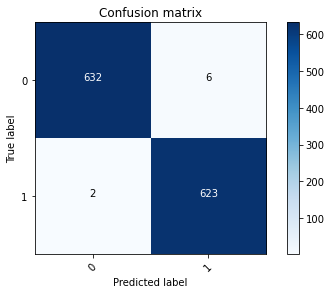

In [172]:
# Can you guess why it such high error compared to other models??
clf = KNeighborsClassifier(n_neighbors=6)
clf = clf.fit(X_train, y_train)
print("Train accuracy :",accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy : ",accuracy_score(y_test, clf.predict(X_test)))
acc["Kneighbours"]=accuracy_score(y_test, clf.predict(X_test))
CM = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(CM, classes = range(2))

Train accuracy : 0.9807286166842661
Test  accuracy :  0.9849564528899446


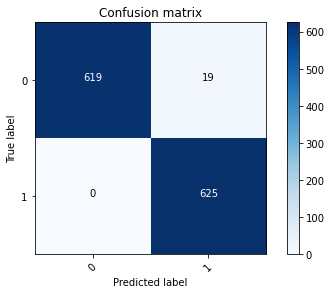

In [173]:
clf = SVC(kernel='rbf', probability=True,class_weight={0:1,1:5})
clf = clf.fit(X_train, y_train)
print("Train accuracy :",accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy : ",accuracy_score(y_test, clf.predict(X_test)))
acc["SVM_1weight"]=accuracy_score(y_test, clf.predict(X_test))
CM = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(CM, classes = range(2))

Train accuracy : 0.9994720168954594
Test  accuracy :  0.997624703087886


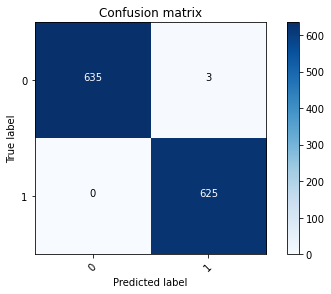

In [174]:
clf = SVC(kernel='rbf', probability=True,class_weight={0:10,1:5},)
clf = clf.fit(X_train, y_train)
print("Train accuracy :",accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy : ",accuracy_score(y_test, clf.predict(X_test)))
acc["SVM_0weight"]=accuracy_score(y_test, clf.predict(X_test))
CM = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(CM, classes = range(2))

Train accuracy : 1.0
Test  accuracy :  0.997624703087886


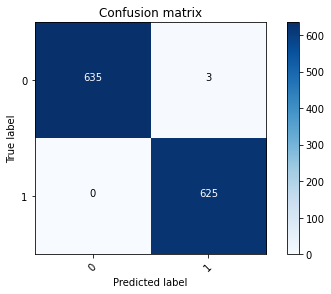

In [175]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print("Train accuracy :",accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy : ",accuracy_score(y_test, clf.predict(X_test)))
acc["DecisionTree"]=accuracy_score(y_test, clf.predict(X_test))
CM = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(CM, classes = range(2))

Train accuracy : 1.0
Test  accuracy :  0.9984164687252574


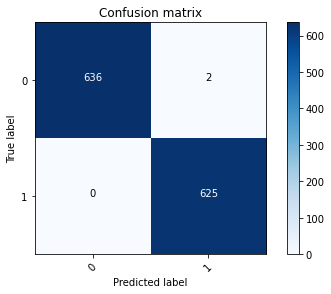

In [176]:
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
print("Train accuracy :",accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy : ",accuracy_score(y_test, clf.predict(X_test)))
acc["RandomForest"]=accuracy_score(y_test, clf.predict(X_test))
CM = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(CM, classes = range(2))

Train accuracy : 1.0
Test  accuracy :  1.0


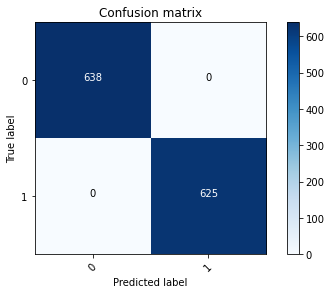

In [177]:
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print("Train accuracy :",accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy : ",accuracy_score(y_test, clf.predict(X_test)))
acc["AdaBoost"]=accuracy_score(y_test, clf.predict(X_test))
CM = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(CM, classes = range(2))

In [178]:
acc_df=pd.DataFrame({"Model":list(acc.keys()),"Accuracy":list(acc.values())})
acc_df

Model  Accuracy
0   Multinomial  0.946952
1   Kneighbours  0.993666
2   SVM_1weight  0.984956
3   SVM_0weight  0.997625
4  DecisionTree  0.997625
5  RandomForest  0.998416
6      AdaBoost  1.000000

In [179]:
px.bar(acc_df,"Model","Accuracy","Model","Accuracy",hover_name="Accuracy")

## AdaBoost gives the most accuracy out of all models, hence Adaboost model is used for deploying the project. And T5 pre trained model is used to produce the summary